# Load and summary the model

In [1]:
import import_ipynb
from architecture import *

n_classes = 5
model = FCN8(nClasses = n_classes, input_height = 224, input_width  = 224)

model.summary()

importing Jupyter notebook from architecture.ipynb


Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

# Path to saved data

In [2]:
# there X and Y data
data_path = 'E:/NN\'s/weights, data on so so/'

import numpy as np

X = np.load(data_path + 'X_data.npy')
Y = np.load(data_path + 'Y_data.npy')

print(X.shape, Y.shape)

(260, 224, 224, 3) (260, 224, 224, 5)


# Shuffle

In [3]:
from sklearn.utils import shuffle
 
# shuffle
train_rate = 0.85
index_train = np.random.choice(X.shape[0],int(X.shape[0]*train_rate),replace=False)
index_test  = list(set(range(X.shape[0])) - set(index_train))
                            
X, Y = shuffle(X,Y)
X_train, y_train = X[index_train],Y[index_train]
X_test, y_test = X[index_test],Y[index_test]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(221, 224, 224, 3) (221, 224, 224, 5)
(39, 224, 224, 3) (39, 224, 224, 5)


# Import usual libraries

In [4]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
import pandas as pd 
import os

warnings.filterwarnings("ignore")

os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

print("python {}".format(sys.version))
print("keras version {}".format(keras.__version__)); del keras
print("tensorflow version {}".format(tf.__version__))

python 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 18:50:55) [MSC v.1915 64 bit (AMD64)]
keras version 2.2.4
tensorflow version 1.5.0


# Training

In [5]:
from keras import optimizers

sgd = optimizers.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

hist1 = model.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  batch_size=32,epochs=200,verbose=2)

Train on 221 samples, validate on 39 samples
Epoch 1/200
 - 13s - loss: 1.6773 - acc: 0.2091 - val_loss: 1.6103 - val_acc: 0.2096
Epoch 2/200
 - 6s - loss: 1.6080 - acc: 0.2181 - val_loss: 1.6059 - val_acc: 0.2259
Epoch 3/200
 - 6s - loss: 1.6047 - acc: 0.2299 - val_loss: 1.6034 - val_acc: 0.2332
Epoch 4/200
 - 6s - loss: 1.6012 - acc: 0.2367 - val_loss: 1.5987 - val_acc: 0.2379
Epoch 5/200
 - 6s - loss: 1.5950 - acc: 0.2432 - val_loss: 1.5904 - val_acc: 0.2484
Epoch 6/200
 - 6s - loss: 1.5829 - acc: 0.2651 - val_loss: 1.5738 - val_acc: 0.2818
Epoch 7/200
 - 6s - loss: 1.5574 - acc: 0.3020 - val_loss: 1.5355 - val_acc: 0.3221
Epoch 8/200
 - 6s - loss: 1.4928 - acc: 0.3550 - val_loss: 1.4228 - val_acc: 0.4077
Epoch 9/200
 - 6s - loss: 1.3047 - acc: 0.4809 - val_loss: 1.2180 - val_acc: 0.5386
Epoch 10/200
 - 6s - loss: 1.0581 - acc: 0.6008 - val_loss: 0.9877 - val_acc: 0.6065
Epoch 11/200
 - 6s - loss: 0.9055 - acc: 0.6344 - val_loss: 0.8698 - val_acc: 0.6159
Epoch 12/200
 - 6s - loss: 0

Epoch 97/200
 - 6s - loss: 0.3128 - acc: 0.8776 - val_loss: 0.3663 - val_acc: 0.8527
Epoch 98/200
 - 6s - loss: 0.3127 - acc: 0.8782 - val_loss: 0.4473 - val_acc: 0.8145
Epoch 99/200
 - 6s - loss: 0.3270 - acc: 0.8708 - val_loss: 0.3609 - val_acc: 0.8559
Epoch 100/200
 - 6s - loss: 0.3106 - acc: 0.8782 - val_loss: 0.3620 - val_acc: 0.8575
Epoch 101/200
 - 6s - loss: 0.3260 - acc: 0.8721 - val_loss: 0.3742 - val_acc: 0.8476
Epoch 102/200
 - 6s - loss: 0.3044 - acc: 0.8810 - val_loss: 0.3553 - val_acc: 0.8590
Epoch 103/200
 - 6s - loss: 0.3018 - acc: 0.8824 - val_loss: 0.4255 - val_acc: 0.8234
Epoch 104/200
 - 6s - loss: 0.3327 - acc: 0.8671 - val_loss: 0.3564 - val_acc: 0.8580
Epoch 105/200
 - 6s - loss: 0.2981 - acc: 0.8842 - val_loss: 0.3576 - val_acc: 0.8569
Epoch 106/200
 - 6s - loss: 0.2986 - acc: 0.8834 - val_loss: 0.3856 - val_acc: 0.8420
Epoch 107/200
 - 6s - loss: 0.2943 - acc: 0.8852 - val_loss: 0.3554 - val_acc: 0.8603
Epoch 108/200
 - 6s - loss: 0.2935 - acc: 0.8862 - val_lo

Epoch 193/200
 - 6s - loss: 0.2357 - acc: 0.9082 - val_loss: 0.3872 - val_acc: 0.8480
Epoch 194/200
 - 6s - loss: 0.2469 - acc: 0.9028 - val_loss: 0.3278 - val_acc: 0.8705
Epoch 195/200
 - 6s - loss: 0.2345 - acc: 0.9088 - val_loss: 0.3287 - val_acc: 0.8699
Epoch 196/200
 - 6s - loss: 0.2318 - acc: 0.9102 - val_loss: 0.3307 - val_acc: 0.8708
Epoch 197/200
 - 6s - loss: 0.2343 - acc: 0.9087 - val_loss: 0.3579 - val_acc: 0.8577
Epoch 198/200
 - 6s - loss: 0.2320 - acc: 0.9094 - val_loss: 0.3418 - val_acc: 0.8636
Epoch 199/200
 - 6s - loss: 0.2462 - acc: 0.9025 - val_loss: 0.3339 - val_acc: 0.8699
Epoch 200/200
 - 6s - loss: 0.2388 - acc: 0.9066 - val_loss: 0.3481 - val_acc: 0.8605


In [6]:
model.save('E:/NN\'s/weights, data on so so/fcnn-light_sources_200.h5')

# Plot the change in loss over epochs

In [7]:
import matplotlib.pyplot as plt

for key in ['loss', 'val_loss']:
    plt.plot(hist1.history[key],label=key)
plt.legend()
plt.show()

'''Calculate intersection over union for each segmentation class'''

y_pred = model.predict(X_test)
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_testi.shape,y_predi.shape)

<Figure size 640x480 with 1 Axes>

(39, 224, 224) (39, 224, 224)


# Calculate intersection over union for each segmentation class

In [8]:
y_pred = model.predict(X_test)
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_testi.shape,y_predi.shape)

def IoU(Yi,y_predi):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    Nclass = int(np.max(Yi)) + 1
    for c in range(Nclass):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(y_testi, y_predi)

(39, 224, 224) (39, 224, 224)
class 00: #TP=1132964, #FP=143977, #FN=53697, IoU=0.851
class 01: #TP=486723, #FP=104785, #FN=146441, IoU=0.660
class 02: #TP= 63456, #FP= 22642, #FN=52330, IoU=0.458
class 03: #TP=   346, #FP=   898, #FN=12254, IoU=0.026
class 04: #TP=   343, #FP=   730, #FN= 8310, IoU=0.037
_________________
Mean IoU: 0.406


# Apply color pallete to masks (to vizualize)

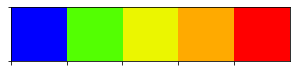

In [9]:
import random
import numpy as np
import seaborn as sns

flatui = ["#0000ff","#53ff02","#ebf600","#ffaa00","#ff0000"]
sns.set_palette(flatui)  
sns.palplot(sns.color_palette())

def give_color_to_seg_img(seg,n_classes):
    #seg : (input_width,input_height,3)
    
    if len(seg.shape)==3:     #if 3 channels in image (h*w*c)
        seg = seg[:,:,0]      #from 3 channels to 0, was (300, 400, 3) now (300, 400) 

    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float') #seg_img = (300,400,3)
   
    colors = sns.color_palette(flatui, n_classes)
    
    for c in range(n_classes):
        segc = (seg == c); #print('segc is' + str(segc.shape)) #300 400
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

# Show original/predicted/ground truth

(39, 224, 224) (39, 224, 224)


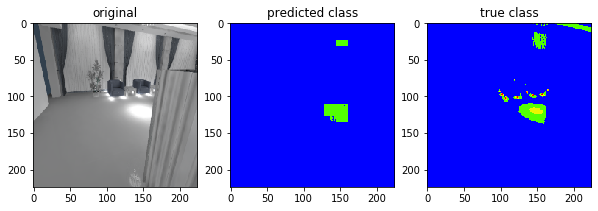

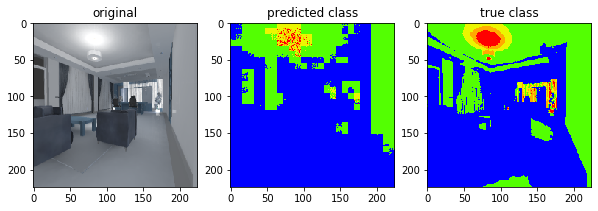

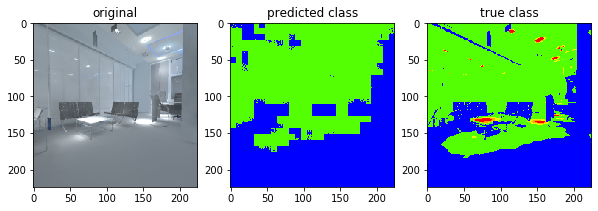

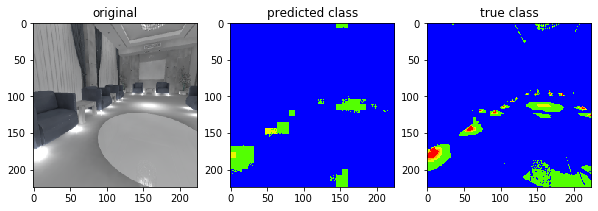

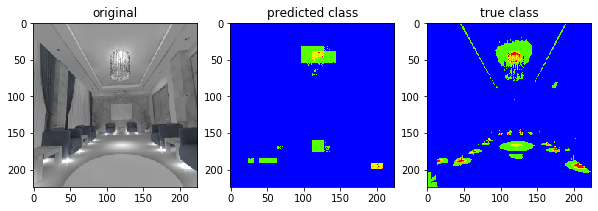

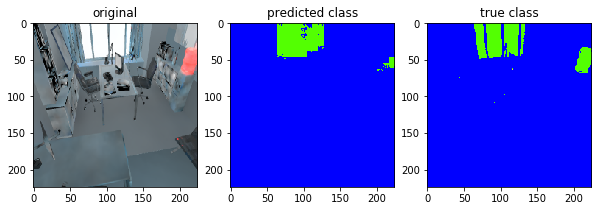

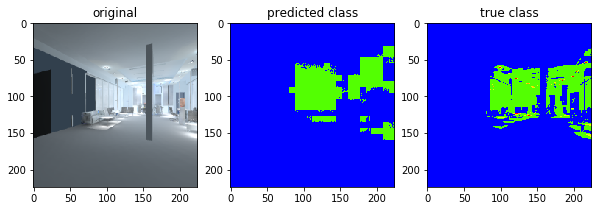

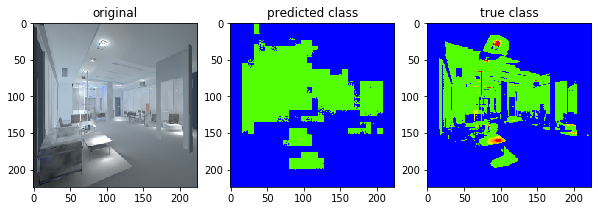

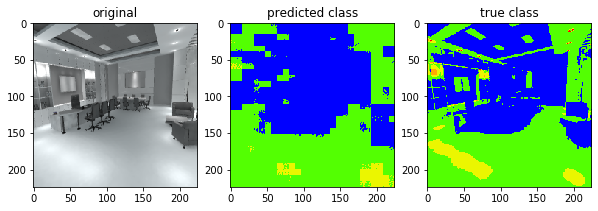

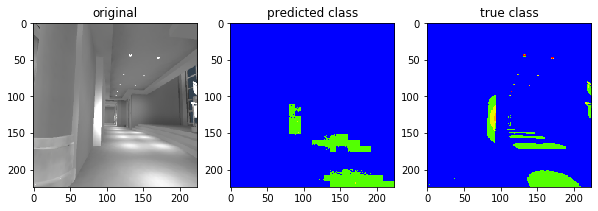

In [12]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_testi.shape,y_predi.shape)

shape = (224,224)
n_classes= 5

for i in range(10):
    img_is  = (X_test[i] + 1)*(255.0/2)
    seg = y_predi[i]
    segtest = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is/255.0)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img(segtest,n_classes))
    ax.set_title("true class")
    plt.show()